In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv("/Users/hitesh04/Downloads/DSBD/Iris.csv")
df['Species'] = LabelEncoder().fit_transform(df['Species'])
X = df.drop('Species', axis=1)
y = df['Species']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
accuracies = []
k_range = range(1, 11)

In [5]:

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

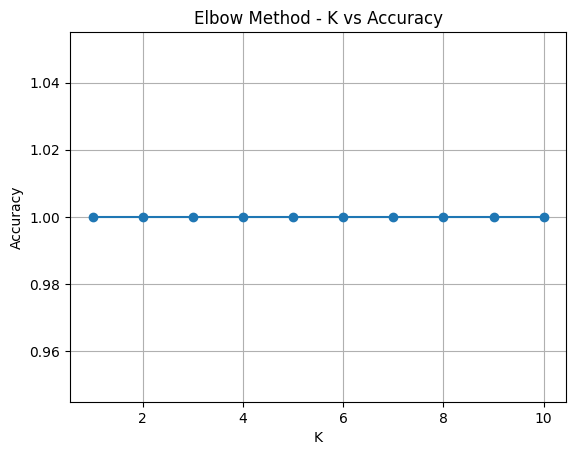

In [6]:
plt.plot(k_range, accuracies, marker='o')
plt.title('Elbow Method - K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [7]:
best_k = accuracies.index(max(accuracies)) + 1

In [8]:
start = time.time()
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
final_acc = accuracy_score(y_test, final_model.predict(X_test))
end = time.time()


In [9]:
print("Best K:", best_k)
print("Accuracy with K =", best_k, "is", round(final_acc, 2))
print("Time taken to build model:", round(end - start, 4), "seconds")

Best K: 1
Accuracy with K = 1 is 1.0
Time taken to build model: 0.0101 seconds
